In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# DATA COLLECTION AND EXPLORATION 

In [2]:
# Load the dataset
df = pd.read_csv("Hip_fracture_hospitalization_rate_among_men_ages_65_and_older__New_Jersey__by_year__Beginning_2010.csv")



In [3]:
# Check the structure of the dataset
print("Dataset shape:", df.shape)


Dataset shape: (45, 3)


In [4]:
print("\nColumn names and data types:")
print(df.dtypes)



Column names and data types:
Data Year        object
Race             object
Rate Per lakh     int64
dtype: object


In [5]:
print("\nFirst few rows of the dataset:")
print(df.head())





First few rows of the dataset:
  Data Year      Race  Rate Per lakh
0      2010       All            362
1      2010     White            407
2      2010     Black            201
3      2010  Hispanic            205
4      2010     Asian            107


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Data Year      45 non-null     object
 1   Race           45 non-null     object
 2   Rate Per lakh  45 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [7]:
# Summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe())




Summary statistics of numerical columns:
       Rate Per lakh
count      45.000000
mean      235.044444
std       111.824732
min        95.000000
25%       141.000000
50%       188.000000
75%       353.000000
max       407.000000


In [8]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
Data Year        0
Race             0
Rate Per lakh    0
dtype: int64


# DATA PREPROCESSING

In [9]:
# Check if 'Race' column is already one-hot encoded
if 'Race' not in df.columns and not df.filter(like='Race').empty:
    print("The 'Race' column is already one-hot encoded.")
else:
    # Check for missing values
    print("Missing values in the dataset:")
    print(df.isnull().sum())

    # Drop any rows with missing values
    df.dropna(inplace=True)

    # Convert 'Data Year' column to categorical (optional)
    df['Data Year'] = df['Data Year'].astype('category')

    # Convert 'Race' column to categorical
    df['Race'] = df['Race'].astype('category')

    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=['Race'], drop_first=True)

    # Separate features (X) and target variable (y)
    X = df.drop(columns=['Rate Per lakh'])
    y = df['Rate Per lakh']
    

Missing values in the dataset:
Data Year        0
Race             0
Rate Per lakh    0
dtype: int64


In [10]:
# Display the preprocessed dataset
print("\nPreprocessed dataset:")
print(X.head())


Preprocessed dataset:
  Data Year  Race_Asian  Race_Black  Race_Hispanic  Race_White
0      2010       False       False          False       False
1      2010       False       False          False        True
2      2010       False        True          False       False
3      2010       False       False           True       False
4      2010        True       False          False       False


In [11]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)


In [12]:
X['Data Year'] = pd.to_numeric(X['Data Year'], errors='coerce')

# Drop rows with NaN values in 'Data Year'
X.dropna(subset=['Data Year'], inplace=True)

In [13]:
y = y.loc[X.index]

# EXPLORATORY DATA ANALYSIS

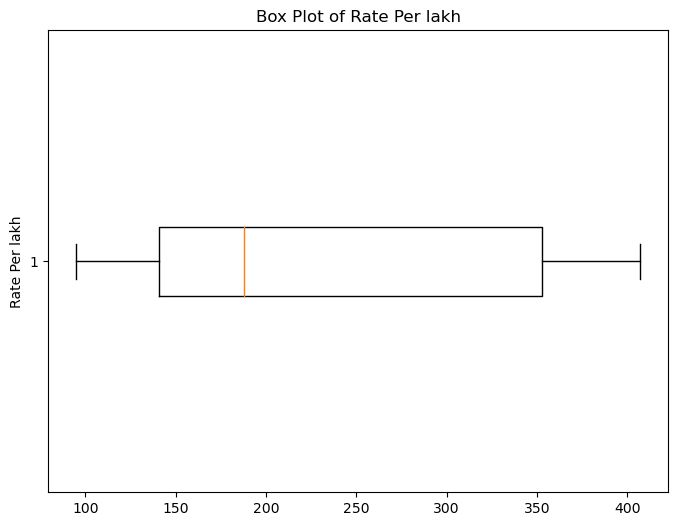

In [14]:
# Visualize the distribution of 'Rate Per lakh' using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Rate Per lakh'], vert=False)
plt.title('Box Plot of Rate Per lakh')
plt.ylabel('Rate Per lakh')
plt.show()

# MODEL SELECTION AND TRAINING

In [15]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize the linear regression model
model = LinearRegression()

In [17]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([110.92281076, 398.04160615, 344.61303472, 102.27718924,
       123.89124303, 189.65824861, 168.04419482, 176.68981633])

# MODEL EVALUATION AND INTERPRETATON

In [20]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 335.05813723982254
R-squared (R2) Score: 0.9640504601323587


In [21]:
# summary of the model 
print('model intercept :', model.intercept_) 
print('model coefficients : ', model.coef_) 
print('Model score : ', model.score(X, y))

model intercept : 9046.43108981798
model coefficients :  [  -4.32281076 -233.69022396 -159.27759687 -177.82662934   53.42857143]
Model score :  0.981264438173565


In [22]:
explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)

print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.9647
mean_squared_log_error:  0.0157
r2:  0.9641
MAE:  16.0812
MSE:  335.0581
RMSE:  18.3046


# VISUALISING THE MODEL'S PERFORMANCE

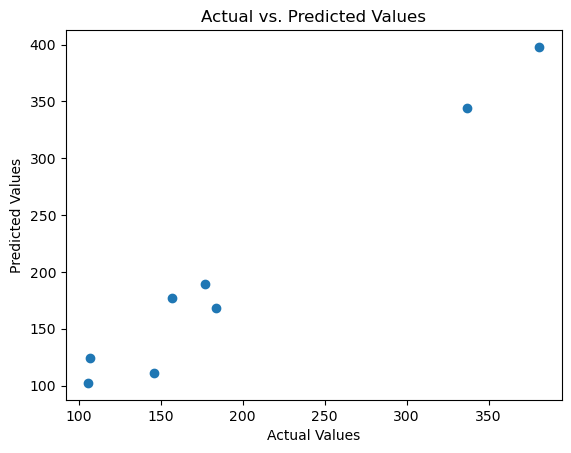

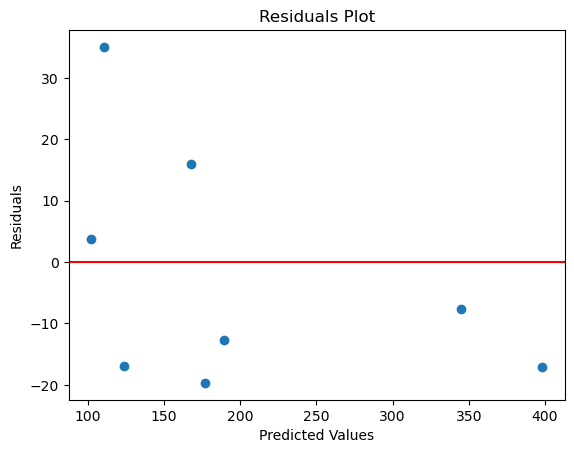

In [23]:

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
